In [1]:
# %%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install pytube --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 64.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.0 MB/s eta 0:00:00


In [1]:
import torch
torch.__version__

'1.13.1+cu117'

In [2]:
torch.cuda.get_device_name(0)

'Tesla T4'

# Fine-tuning YOLONAS on custom dataset

Fine Tune means use pretrained model that fine tune that on custom dataset

The Trainer

ckpt_root_dir - this is the directory where results from all your experiments will be saved

experiment_name - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here.

In [3]:
from super_gradients.training import Trainer

The console stream is logged into /root/sg_logs/console.log


[2023-06-03 02:56:57] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-06-03 02:57:02] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-06-03 02:57:02] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-06-03 02:57:02] WARNING - export.py - Failed to import pytorch_quantization
[2023-06-03 02:57:02] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [4]:
CHECKPOINT_DIR = 'checkpointsints'

In [5]:
trainer = Trainer(experiment_name='my_construction_yolonas_model', ckpt_root_dir=CHECKPOINT_DIR)

# Dataset and DataLoader

In [6]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [7]:

dataset_params = {
    'data_dir':'/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/archive/css-data',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']
}

DataLoader

In [8]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

# Data Augmentation - Just using the inbuilt Library

SuperGradients added transforms. we can experiment with transforms, albumentations or a custom tranformaton.

In [9]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

In [10]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [11]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees']

10.0

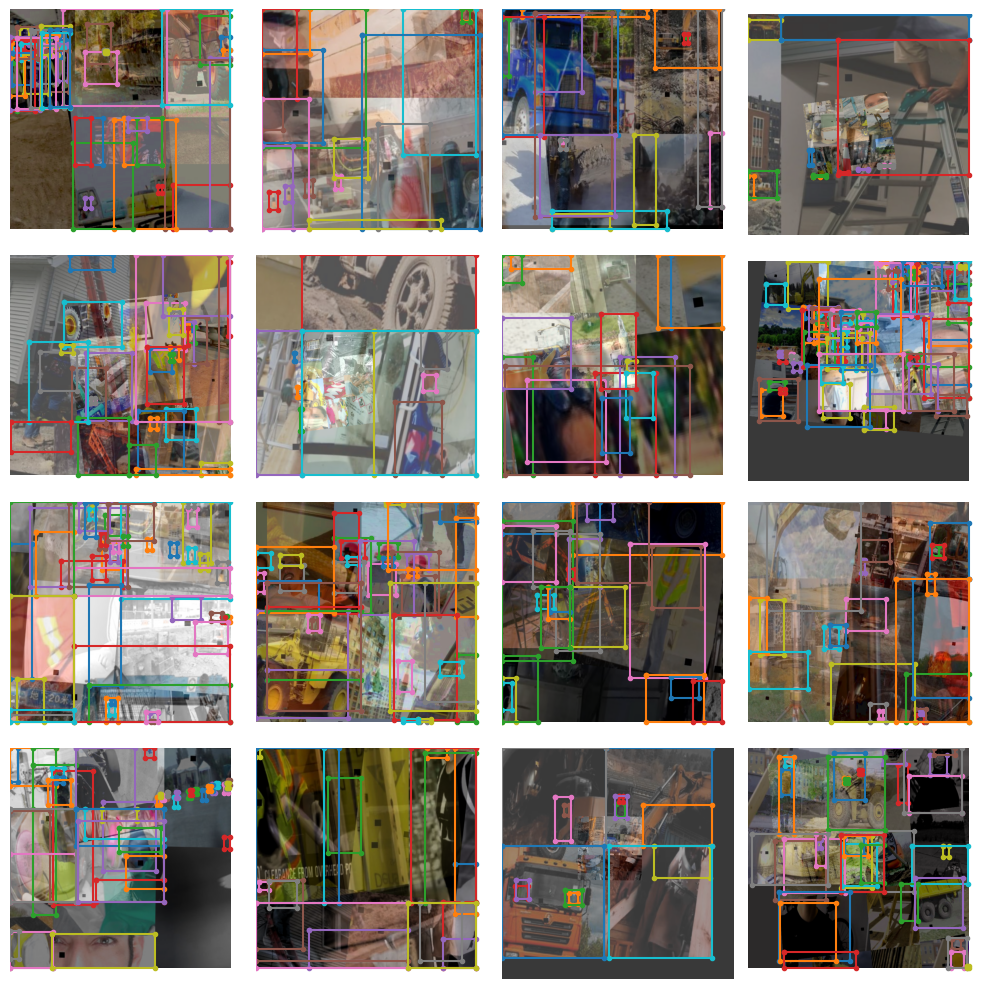

In [12]:
train_data.dataset.plot()

# Initialize the Model

In [13]:
from super_gradients.training import models

In [14]:
# Pretrained model
model = models.get('yolo_nas_l', 
                   num_classes=len(dataset_params['classes']), 
                   pretrained_weights="coco"
                   )

[2023-06-03 03:44:48] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


  0%|          | 0.00/256M [00:00<?, ?B/s]

In [15]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [17]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": 15,
    # if GPU cude - turn this to true
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [18]:
# training the model
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2023-06-03 03:45:55] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-06-03 03:45:59] INFO - utils.py - NumExpr defaulting to 2 threads.


The console stream is now moved to checkpo/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/checkpointsints/my_construction_yolonas_model/console_Jun03_03_45_59.txt


[2023-06-03 03:46:07] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 2599       (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         162        (len(train_loader))
    - Gradient updates per epoch:   162        (len(train_loader) / batch_accumulate)

[2023-06-03 03:50:44] INFO - base_sg_logger.py - Checkpoint saved in checkpo/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/checkpointsints/my_construction_yolonas_model/ckpt_best.pth
[2023-06-03 03:50:44] INFO - sg_trainer.py - Best checkpoint overriden: validation

SUMMARY OF EPOCH 15
├── Training
│   ├── Ppyoloeloss/loss = 1.9478
│   │   ├── Best until now = 1.9558 (↘ -0.0079)
│   │   └── Epoch N-1      = 1.9558 (↘ -0.0079)
│   ├── Ppyoloeloss/loss_cls = 0.9655
│   │   ├── Best until now = 0.9681 (↘ -0.0026)
│   │   └── Epoch N-1      = 0.9681 (↘ -0.0026)
│   ├── Ppyoloeloss/loss_dfl = 1.0819
│   │   ├── Best until now = 1.085  (↘ -0.0032)
│   │   └── Epoch N-1      = 1.085  (↘ -0.0032)
│   └── Ppyoloeloss/loss_iou = 0.1766
│       ├── Best until now = 0.1781 (↘ -0.0015)
│       └── Epoch N-1      = 0.1781 (↘ -0.0015)
└── Validation
    ├── F1@0.50 = 0.1061
    │   ├── Best until now = 0.1079 (↘ -0.0017)
    │   └── Epoch N-1      = 0.104  (↗ 0.0022)
    ├── Map@0.50 = 0.6922
    │   ├── Best until now = 0.701  (↘ -0.0088)
    │   └── Epoch N-1      = 0.701  (↘ -0.0088)
    ├── Ppyoloeloss/loss = 2.2257
    │   ├── Best until now = 2.1523 (↗ 0.0734)
    │   └── Epoch N-1      = 2.1579 (↗ 0.0677)
    ├── Ppyoloeloss/loss_cls = 0.9416
    │   ├── 

# Get the best model from checkpoint

In [19]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpo/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/checkpointsints/my_construction_yolonas_model/ckpt_best.pth")

[2023-06-03 05:04:48] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpo/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/checkpointsints/my_construction_yolonas_model/ckpt_best.pth EMA checkpoint.


# Evaluating the best trained model on the test set

In [20]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Test: 100%|██████████| 5/5 [00:05<00:00,  1.20it/s]

{'PPYoloELoss/loss_cls': 0.89343435,
 'PPYoloELoss/loss_iou': 0.22859584,
 'PPYoloELoss/loss_dfl': 1.2013102,
 'PPYoloELoss/loss': 2.065579,
 'Precision@0.50': tensor(0.0802),
 'Recall@0.50': tensor(0.7940),
 'mAP@0.50': tensor(0.6663),
 'F1@0.50': tensor(0.1393)}

Test: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


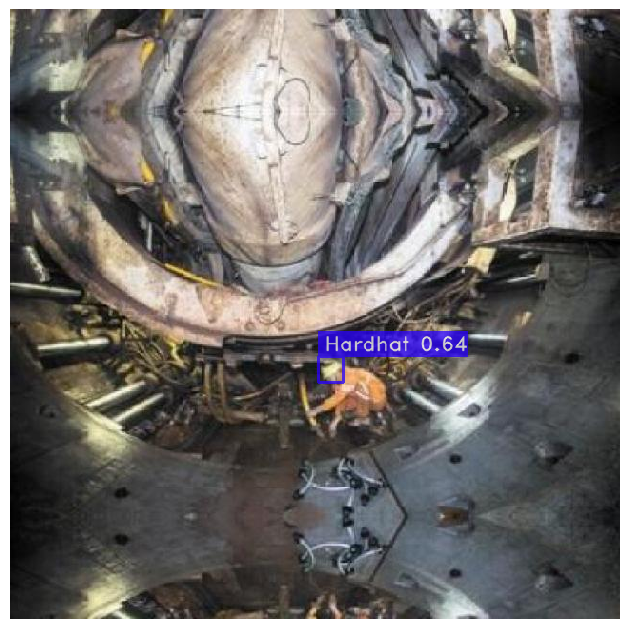

In [21]:
test_image = '/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/archive/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg'
best_model.predict(test_image).show()

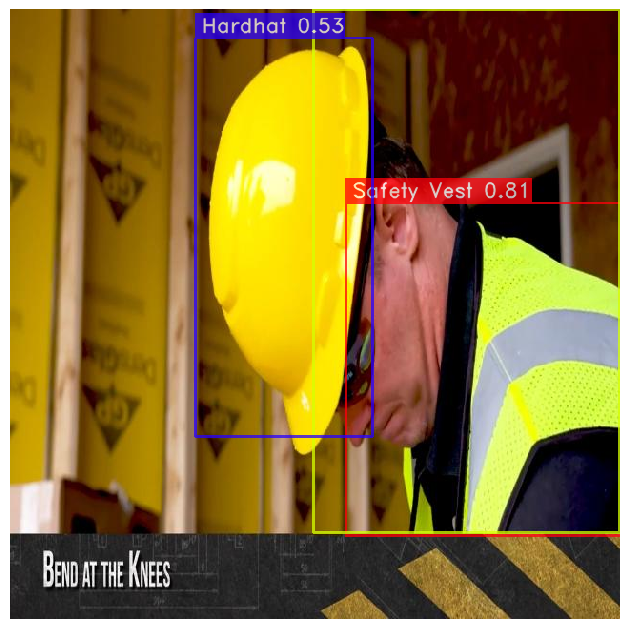

In [25]:
test_image = '/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/archive/css-data/test/images/youtube-631_jpg.rf.7c6ecf859c1b0a659f8ea057ad27aebd.jpg'
best_model.predict(test_image).show()

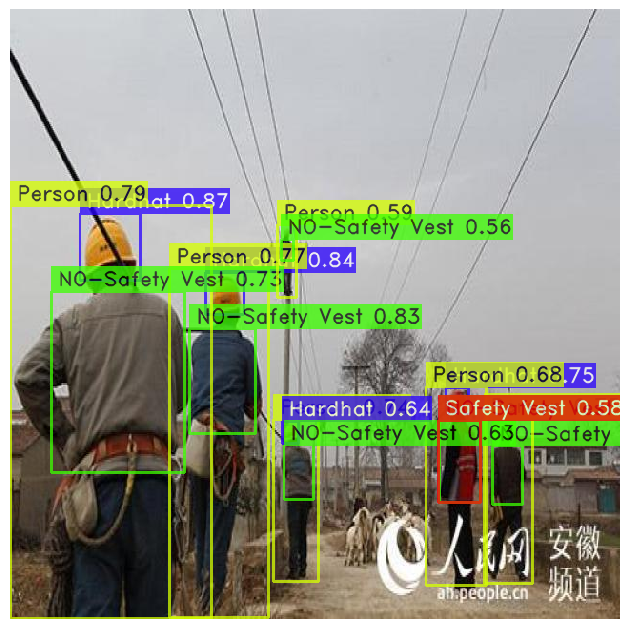

In [27]:
test_image = '/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/archive/css-data/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg'
best_model.predict(test_image).show()

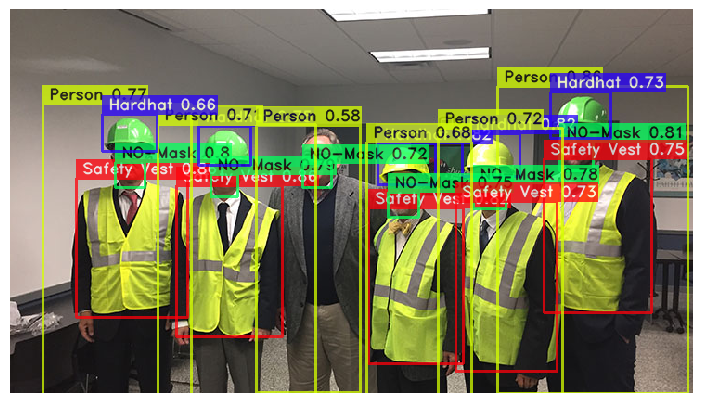

In [29]:
test_image = '/content/drive/MyDrive/Colab_Notebooks/ObjectDetection/YOLO-NAS-main/Construction/archive/source_files/source_files/schupan_japan1web.jpg'
best_model.predict(test_image).show()